# Multiple Linear Regression Implementation from Scratch

This notebook demonstrates how to implement Multiple Linear Regression from scratch using only NumPy. We'll cover:

1. Implementation of the Multiple Linear Regression class
2. Data generation and preprocessing
3. Model training and evaluation
4. Visualization of results

The key difference from simple linear regression is that we'll work with multiple features instead of just one.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
import imageio


## Multiple Linear Regression Class Implementation from Scratch With Gradient Descent

Our implementation includes:
- Gradient descent optimization
- Mean squared error loss
- Training history tracking 

In [3]:
class MultipleLinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.history = {'loss': [], 'weights': [], 'bias': []}
        
    def fit(self, X, y):
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y = y.reshape(-1)
        
        # Gradient descent
        for i in range(self.n_iterations):
            # Forward pass
            y_predicted = self.predict(X)
            
            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Compute and store loss
            loss = np.mean((y_predicted - y) ** 2)
            self.history['loss'].append(loss)
            self.history['weights'].append(self.weights.copy())
            self.history['bias'].append(self.bias)

            # Print progress every 100 iterations
            if (i + 1) % 100 == 0:
                print(f'Iteration {i + 1}/{self.n_iterations}, Loss: {loss:.4f}')
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


## MultipleLinearRegressionNormal Implementation from Scratch
Equation: $\beta = (X^T X)^{-1} X^T y$

In [4]:
class MultipleLinearRegressionNormal:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Add a bias term (column of ones) to X
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        # Calculate weights using the normal equation
        betas = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        self.bias = betas[0]  # First value is the intercept
        self.weights = betas[1:]  # Remaining values are the slopes

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Generate Synthetic Data

We'll create a dataset with 3 features and known relationships:
- $y = 2 + 3x₁ + 1.5x₂ - 2x₃ + noise$

In [5]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate features
n_samples = 1000
X = np.random.rand(n_samples, 3)  # 3 features

# True parameters
true_weights = np.array([3, 1.5, -2])
true_bias = 2

# Generate target variable with noise
y = true_bias + np.dot(X, true_weights) + np.random.randn(n_samples) * 0.5
y = y.reshape(-1, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Dataset shapes:
X_train: (800, 3)
y_train: (800, 1)
X_test: (200, 3)
y_test: (200, 1)


## Train the Model

In [6]:
# Create and train the model
model = MultipleLinearRegression(learning_rate=0.06, n_iterations=700)
model.fit(X_train, y_train)

Iteration 100/700, Loss: 0.6400
Iteration 200/700, Loss: 0.3940
Iteration 300/700, Loss: 0.2992
Iteration 400/700, Loss: 0.2624
Iteration 500/700, Loss: 0.2480
Iteration 600/700, Loss: 0.2423
Iteration 700/700, Loss: 0.2400


In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

# Create visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3)

# Loss plot
loss_line, = ax1.plot([], [], lw=2, label='Loss')
ax1.set_title('Loss Progression')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss')
ax1.set_xlim(0, model.n_iterations)
ax1.set_ylim(0, max(model.history['loss']) * 1.1)
ax1.grid(True)
ax1.legend()

# Weights and Bias plot
colors = ['r', 'g', 'b', 'purple']
true_colors = ['darkred', 'darkgreen', 'darkblue', 'darkmagenta']
labels = ['Weight 1', 'Weight 2', 'Weight 3', 'Bias']
true_labels = ['True Weight 1', 'True Weight 2', 'True Weight 3', 'True Bias']

# Create lines for predicted and true values
weight_lines = [ax2.plot([], [], color=colors[i], label=labels[i])[0] 
                for i in range(4)]
true_weight_lines = [ax2.plot([], [], color=true_colors[i], linestyle='--', 
                               label=true_labels[i])[0] for i in range(4)]

ax2.set_title('Model Parameters vs True Values')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Parameter Value')
ax2.set_xlim(0, model.n_iterations)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.grid(True)

# Annotation for current iteration
iteration_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes, 
                           verticalalignment='top')

# Animation initialization
def init():
    loss_line.set_data([], [])
    for line in weight_lines + true_weight_lines:
        line.set_data([], [])
    iteration_text.set_text('')
    return [loss_line] + weight_lines + true_weight_lines + [iteration_text]

# Animation update function
def update(frame):
    # Loss progression
    loss_line.set_data(range(frame), model.history['loss'][:frame])
    
    # Update iteration text
    iteration_text.set_text(f'Iteration: {frame}/{model.n_iterations}')
    
    # Weights and bias progression
    full_params = [*model.history['weights'][:frame], model.history['bias'][:frame]]
    
    for i, line in enumerate(weight_lines[:3]):
        line.set_data(range(frame), 
                      [weights[i] for weights in model.history['weights'][:frame]])
    
    # Bias is the last element
    weight_lines[3].set_data(range(frame), model.history['bias'][:frame])
    
    # True values lines (horizontal lines)
    for i, true_line in enumerate(true_weight_lines):
        true_value = true_weights[i] if i < 3 else true_bias
        true_line.set_data(range(frame), [true_value] * frame)
    
    # Dynamically adjust y-axis limits
    ax1.set_ylim(0, max(model.history['loss']) * 1.1)
    
    # Adjust weight/bias plot y-limits
    all_values = (
        [w for weights in model.history['weights'][:frame] for w in weights] + 
        model.history['bias'][:frame] + 
        list(true_weights) + [true_bias]
    )
    min_val = min(all_values) * 1.1
    max_val = max(all_values) * 1.1
    ax2.set_ylim(min_val, max_val)
    
    return [loss_line] + weight_lines + true_weight_lines + [iteration_text]

# Create animation
anim = FuncAnimation(fig, update, frames=model.n_iterations, 
                     init_func=init, blit=True, interval=20)

# Save as gif
writer = PillowWriter(fps=25)
anim.save("images/ml_regression_training_comparison.gif", writer=writer)

plt.close(fig)

print("Animation saved as ml_regression_training_comparison.gif")

## Multiple_regression with Normal Equation Implementation

In [7]:
# Example usage
model = MultipleLinearRegressionNormal()
model.fit(X_train, y_train)  # Fit the model
predictions = model.predict(X_test)  # Make predictions
test_r2 = r2_score(y_test, predictions)

print("Model Parameters:")
for i, (weight, true_w) in enumerate(zip(model.weights, true_weights)):
    print(f"Feature {i+1} weight: {float(weight)} (True: {true_w})")  # Convert to float for printingweight:.4f} (True: {true_w})")
print(f"Bias: {float(model.bias):.4f} (True: {true_bias})")  # Convert to float for printingmodel.bias:.4f} (True: {true_bias})")

print("\nModel Performance:")
print(f"Testing R² Score: {test_r2:.4f}")

Model Parameters:
Feature 1 weight: 2.8277531469980177 (True: 3.0)
Feature 2 weight: 1.3939082795196802 (True: 1.5)
Feature 3 weight: -2.0709567649745684 (True: -2.0)
Bias: 2.1530 (True: 2)

Model Performance:
Testing R² Score: 0.8438


C:\Users\Dark_Coder\AppData\Local\Temp\ipykernel_17632\4248649199.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Feature {i+1} weight: {float(weight)} (True: {true_w})")  # Convert to float for printingweight:.4f} (True: {true_w})")
C:\Users\Dark_Coder\AppData\Local\Temp\ipykernel_17632\4248649199.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Bias: {float(model.bias):.4f} (True: {true_bias})")  # Convert to float for printingmodel.bias:.4f} (True: {true_bias})")


In [8]:
model.history

AttributeError: 'MultipleLinearRegressionNormal' object has no attribute 'history'

## Evaluate Model Performance

In [69]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Parameters:")
for i, (weight, true_w) in enumerate(zip(model.weights, true_weights)):
    print(f"Feature {i+1} weight: {weight:.4f} (True: {true_w})")
print(f"Bias: {model.bias:.4f} (True: {true_bias})")

print("\nModel Performance:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")

Model Parameters:
Feature 1 weight: 2.7907 (True: 3.0)
Feature 2 weight: 1.4067 (True: 1.5)
Feature 3 weight: -1.9346 (True: -2.0)
Bias: 2.0927 (True: 2)

Model Performance:
Training R² Score: 0.8305
Testing R² Score: 0.8430


## Visualize Training Progress

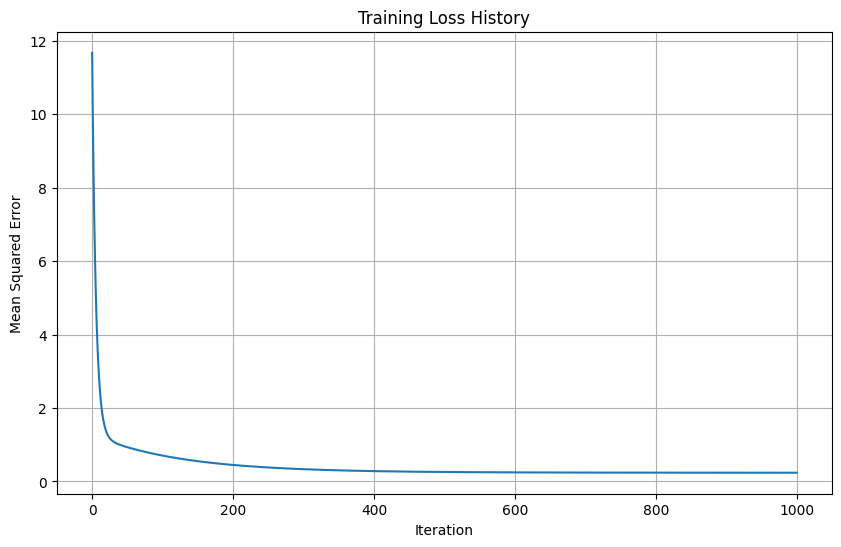

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(model.history['loss'])
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss History')
plt.grid(True)
plt.show()
plt.savefig('images/loss_history.png')

## Visualize Predictions

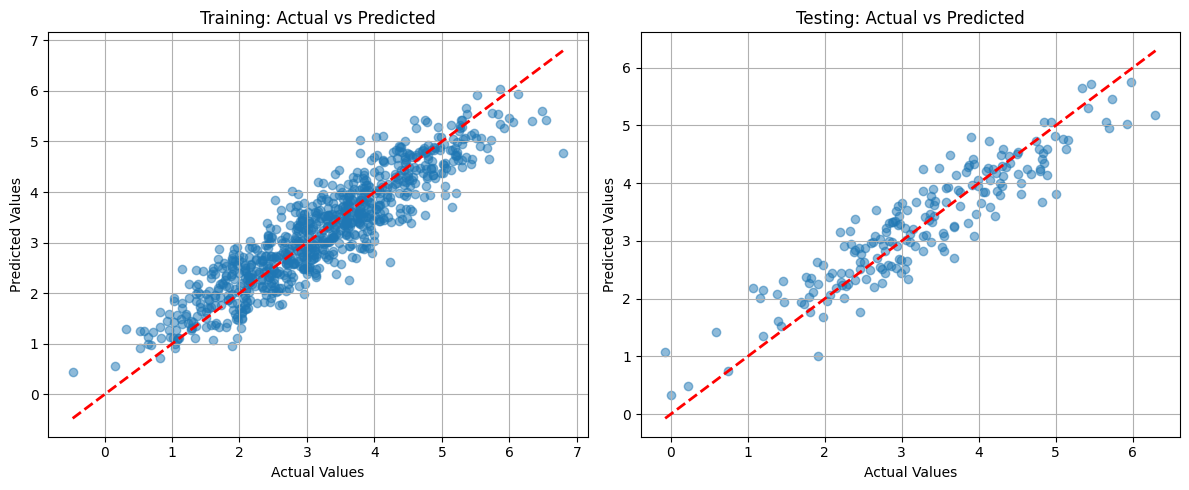

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(12, 5))

# Training data
plt.subplot(121)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training: Actual vs Predicted')
plt.grid(True)

# Testing data
plt.subplot(122)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Testing: Actual vs Predicted')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.savefig('images/actual_vs_predicted.png')

## Feature Importance Visualization

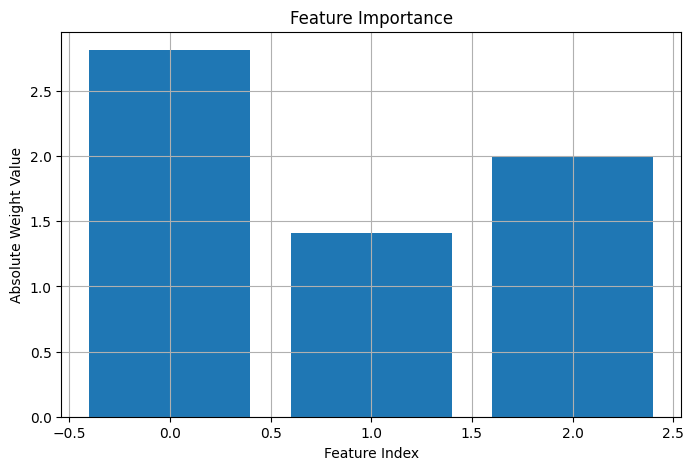

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(model.weights)), abs(model.weights))
plt.xlabel('Feature Index')
plt.ylabel('Absolute Weight Value')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

plt.savefig('images/feature_importance.png')

## Key Observations

1. Our implementation successfully learned the true relationships in the data
2. The model achieved good R² scores on both training and testing data
3. The loss history shows consistent convergence
4. Feature importance visualization helps identify the most influential features

The main advantages of implementing multiple linear regression from scratch:
- Better understanding of the underlying mathematics
- Full control over the optimization process
- Ability to modify the implementation for specific needs

The two classes, `MultipleLinearRegressionNormal` and `MultipleLinearRegression`, implement **multiple linear regression**, but they differ significantly in terms of the approach they use to fit the model and the features they offer. Here's a breakdown of the key differences:

### 1. **Fitting Method:**

   - **`MultipleLinearRegressionNormal`**:
     - **Normal Equation**: This class uses the **normal equation** to compute the optimal weights and bias. The formula is:
       $\beta = (X^T X)^{-1} X^T y$
       
     - **Pros**: The normal equation provides an exact solution and does not require iterations. It's suitable for small datasets and when matrix inversion is feasible.
     - **Cons**: Inverting the matrix can be computationally expensive for large datasets, especially when $ X^T X $ is near-singular or ill-conditioned.

   - **`MultipleLinearRegression`**:
     - **Gradient Descent**: This class uses **gradient descent** to minimize the loss function (mean squared error) iteratively. The gradients for the weights and bias are calculated, and the parameters are updated by moving in the direction of the negative gradient.
     - **Pros**: It can handle large datasets well and is more flexible than the normal equation. It can be used for cases where direct computation of the inverse is not feasible.
     - **Cons**: Requires tuning of the learning rate, and convergence depends on the number of iterations. The method might also get stuck in local minima, though for linear regression this is generally not an issue.

### 2. **Model Parameters:**
   - **`MultipleLinearRegressionNormal`**:
     - Directly computes the weights using matrix operations and the normal equation.
     - It doesn't track intermediate results like loss, weights, or bias throughout the training process.
   
   - **`MultipleLinearRegression`**:
     - Tracks the history of the **loss**, **weights**, and **bias** at each iteration. This allows you to analyze the progress of the model over time.
     - It also has the flexibility to modify the number of iterations and learning rate, which can be adjusted based on the dataset.

### 3. **Computational Complexity:**

   - **`MultipleLinearRegressionNormal`**:
     - The normal equation requires the matrix inversion of $ X^T X $, which has a computational complexity of $ O(n^3) $, where $ n $ is the number of features (columns in $ X $).
     - This can become very expensive as the number of features grows, particularly when the dataset is large.
   
   - **`MultipleLinearRegression`**:
     - Gradient descent has a complexity of $ O(n \cdot m) $ per iteration, where $ (n) $ is the number of features and $ (m) $ is the number of samples. The complexity depends on the number of iterations (`n_iterations`), but it can handle much larger datasets compared to the normal equation.

### 4. **Output/History Tracking:**

   - **`MultipleLinearRegressionNormal`**:
     - The output is only the final weights and bias, which represent the fitted model.
     - It does not track the learning process.
   
   - **`MultipleLinearRegression`**:
     - Keeps track of the loss, weights, and bias for each iteration in a history dictionary (`self.history`).
     - This allows you to visualize how the model is learning over time (e.g., plotting the loss curve).

### 5. **Learning Rate & Iterations:**

   - **`MultipleLinearRegressionNormal`**:
     - No learning rate or number of iterations. The model is fitted using a direct mathematical solution (normal equation).
   
   - **`MultipleLinearRegression`**:
     - **Learning rate** and **number of iterations** are parameters that can be adjusted. The model is fitted iteratively through gradient descent, which requires tuning these parameters.

### 6. **Use Case:**
   - **`MultipleLinearRegressionNormal`**:
     - Suitable for small datasets or problems where the normal equation is computationally feasible and you want an exact solution.
   
   - **`MultipleLinearRegression`**:
     - More suitable for larger datasets or when the normal equation cannot be applied efficiently due to computational constraints (e.g., many features or a large number of samples). Also, this approach can be used in online learning scenarios where new data comes in and the model needs to be updated incrementally.

### Summary Table:

| Feature                           | `MultipleLinearRegressionNormal`              | `MultipleLinearRegression`                        |
|-----------------------------------|-----------------------------------------------|--------------------------------------------------|
| **Fitting Method**                | Normal Equation (direct solution)             | Gradient Descent (iterative)                     |
| **Computation**                   | Matrix inversion                              | Iterative updates (weights and bias)             |
| **Training History**              | No history tracking                           | Tracks loss, weights, and bias at each iteration |
| **Scalability**                   | Less scalable for large datasets              | More scalable for large datasets                 |
| **Learning Rate**                 | Not applicable                                | Learning rate must be defined                    |
| **Number of Iterations**          | Not applicable                                | Number of iterations must be defined             |
| **Computational Complexity**      | $ O(n^3) $ (for matrix inversion)           | $ O(n \cdot m) $ (for gradient descent)        |
| **Use Case**                       | Small datasets, exact solution                | Large datasets, flexible, can handle online learning |

### Conclusion:
- Use **`MultipleLinearRegressionNormal`** if you want a direct, exact solution for small datasets.
- Use **`MultipleLinearRegression`** if you are working with larger datasets or need more flexibility with the optimization process.